# Data Challenge
This notebook analyzed the breast cancer dataset. The analyses include the following sections: 1. data summary, 2. data clean, 3.data exploration, 4. compared and validated the performances of LogisticRegression and Ridge classifier models to classify benign and malignant breast tumors and 5. analyzed the which features are important to train the machine models

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

IOError: [Errno 2] No such file or directory: '../styles/custom.css'

## Analysis Contents
  ### [1. Data Summary](#data_summary)
  ### [2. Data Clean](#data_clean)
  ### [3. Data Exploration](#data_exploration)
  ### [4. Machine Learning](#machine_learning)
  ### [5. Feature Analysis](#feature_analysis)
  ### [6. Summary](#summary)

<a id='data_summary'></a>
### 1. Data Summary

In [1]:
# import libraries for the analysis
import pandas as pd
# get data path
data_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
# read data into the pandas dataframe, there is no header in the file, so the hearder parameter is set as None
data = pd.read_csv(data_path, header = None)
# examine the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The columns are not included in the pandas dataframe. to be convinent, the column names are added

In [2]:
# add column names
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
               'Mitoses', 'Class']
# examine the data again
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# examine how many data points and columns in the dataset
print 'There are %d rows and %d columns.'%(data.shape[0], data.shape[1])

There are 699 rows and 11 columns.


In [4]:
# summarized the data to calculate the mean, std, min, max and qualities for features
selected_cols = data.columns[1:11]
data[selected_cols].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Interesting, the bare nuclei column is not included in this summary table, the data type may be different. So the data types for all columns are examined.

In [5]:
# examine the data types of the data
data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Indeed, the data type for bare Nuclei is object which does not make sense, this could be missing or non numeric values are included in this columns. First, examine the missing values.

In [7]:
# I used a function to detect the missing and non-nummeric values
def detect_missing(df):
    '''
    this function is used to detect the missing or non numberic values
    '''
    for col in df.columns:
        print 'The number of missing values in column %s is %d' %(col, sum(pd.isnull(df[col])))
        
detect_missing(data)    

The number of missing values in column Sample code number is 0
The number of missing values in column Clump Thickness is 0
The number of missing values in column Uniformity of Cell Size is 0
The number of missing values in column Uniformity of Cell Shape is 0
The number of missing values in column Marginal Adhesion is 0
The number of missing values in column Single Epithelial Cell Size is 0
The number of missing values in column Bare Nuclei is 0
The number of missing values in column Bland Chromatin is 0
The number of missing values in column Normal Nucleoli is 0
The number of missing values in column Mitoses is 0
The number of missing values in column Class is 0


So, there is no missing values in the data. There could be other non-numerbic values in the bare nuclei column. Let's find out.

In [8]:
# Use the following function to detect non numeric values
def find_non_numeric(df):
    '''
    this fuction is to detect the non numeric values
    '''
    for col in df.columns:
        count = 0
        print 'Non numeric value in column %s'%(col)
        for value in df[col]:
            try:
                int(value)
            except ValueError:
                count += 1
                print value
        print 'There are %d non-numeric values' %(count)
        
find_non_numeric(data)

Non numeric value in column Sample code number
There are 0 non-numeric values
Non numeric value in column Clump Thickness
There are 0 non-numeric values
Non numeric value in column Uniformity of Cell Size
There are 0 non-numeric values
Non numeric value in column Uniformity of Cell Shape
There are 0 non-numeric values
Non numeric value in column Marginal Adhesion
There are 0 non-numeric values
Non numeric value in column Single Epithelial Cell Size
There are 0 non-numeric values
Non numeric value in column Bare Nuclei
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
There are 16 non-numeric values
Non numeric value in column Bland Chromatin
There are 0 non-numeric values
Non numeric value in column Normal Nucleoli
There are 0 non-numeric values
Non numeric value in column Mitoses
There are 0 non-numeric values
Non numeric value in column Class
There are 0 non-numeric values


In [9]:
data.groupby(['Class', 'Bare Nuclei']).count()

Sample code number  Clump Thickness  \
Class Bare Nuclei                                        
2     1                           387              387   
      10                            3                3   
      2                            21               21   
      3                            14               14   
      4                             6                6   
      5                            10               10   
      7                             1                1   
      8                             2                2   
      ?                            14               14   
4     1                            15               15   
      10                          129              129   
      2                             9                9   
      3                            14               14   
      4                            13               13   
      5                            20               20   
      6                             4                4   
      7                             7                7   
      8                            19               19   
      9                             9                9   
      ?                             2                2   

                   Uniformity of Cell Size  Uniformity of Cell Shape  \
Class Bare Nuclei                                                      
2     1                                387                       387   
      10                                 3                         3   
      2                                 21                        21   
      3                                 14                        14   
      4                                  6                         6   
      5                                 10                        10   
      7                                  1                         1   
      8                                  2                         2   
      ?                                 14                        14   
4     1                                 15                        15   
      10                               129                       129   
      2                                  9                         9   
      3                                 14                        14   
      4                                 13                        13   
      5                                 20                        20   
      6                                  4                         4   
      7                                  7                         7   
      8                                 19                        19   
      9                                  9                         9   
      ?                                  2                         2   

                   Marginal Adhesion  Single Epithelial Cell Size  \
Class Bare Nuclei                                                   
2     1                          387                          387   
      10                           3                            3   
      2                           21                           21   
      3                           14                           14   
      4                            6                            6   
      5                           10                           10   
      7                            1                            1   
      8                            2                            2   
      ?                           14                           14   
4     1                           15                           15   
      10                         129                          129   
      2                            9                            9   
      3                           14                           14   
      4                           13                           13   
      5                           20                 

As showed above, the '?' character is included in Bare Nuclei column. Then the data clean will be applied for bare nuclei column to remove '?'.

<a id='data_clean'></a>
### 2. Data Clean

In [10]:
# replace '?' with 0 in Bare Nuclei column and convert the datatype to integer
new_values = []
for value in data['Bare Nuclei'].values:
    if value == '?':
        new_values.append(0)
    else:
        new_values.append(int(value))
data['Bare Nuclei'] = new_values
# examine the non numeric values and missing values again
find_non_numeric(data)
detect_missing(data)    

Non numeric value in column Sample code number
There are 0 non-numeric values
Non numeric value in column Clump Thickness
There are 0 non-numeric values
Non numeric value in column Uniformity of Cell Size
There are 0 non-numeric values
Non numeric value in column Uniformity of Cell Shape
There are 0 non-numeric values
Non numeric value in column Marginal Adhesion
There are 0 non-numeric values
Non numeric value in column Single Epithelial Cell Size
There are 0 non-numeric values
Non numeric value in column Bare Nuclei
There are 0 non-numeric values
Non numeric value in column Bland Chromatin
There are 0 non-numeric values
Non numeric value in column Normal Nucleoli
There are 0 non-numeric values
Non numeric value in column Mitoses
There are 0 non-numeric values
Non numeric value in column Class
There are 0 non-numeric values
The number of missing values in column Sample code number is 0
The number of missing values in column Clump Thickness is 0
The number of missing values in column U

In [11]:
data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

<a id='data_exploration'></a>
### 3. Data Exploration
First, the number of cases in each class are examined

In [12]:
# examine how many begine and magliment samples
print 'Numer of begine calsses is %d' %(sum(data['Class'] == 2))
print 'Numer of magliment calsses is %d' %(sum(data['Class'] == 4))

Numer of begine calsses is 458
Numer of magliment calsses is 241


It is unbalanced classes!!

Then, the distribution of each feature is checked.

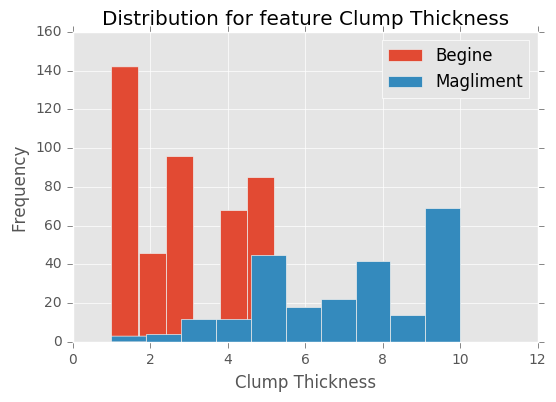

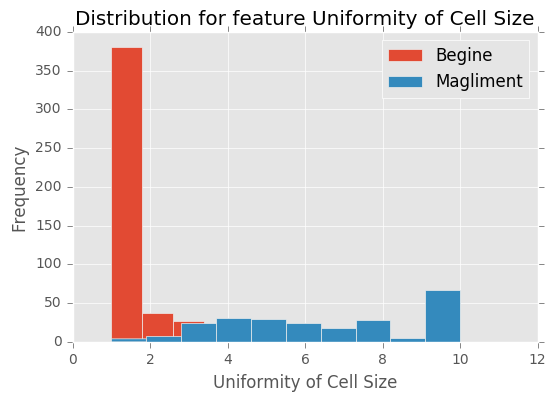

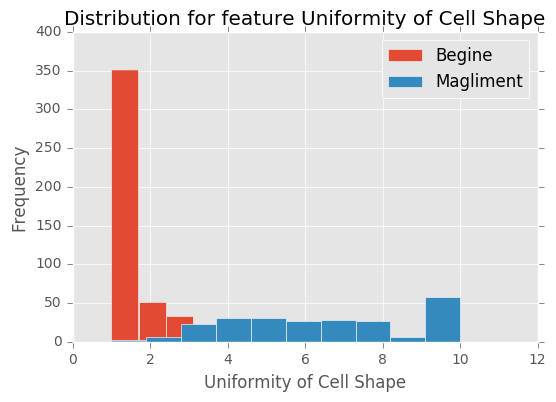

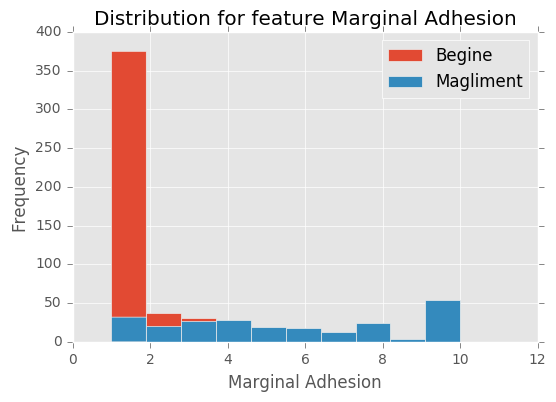

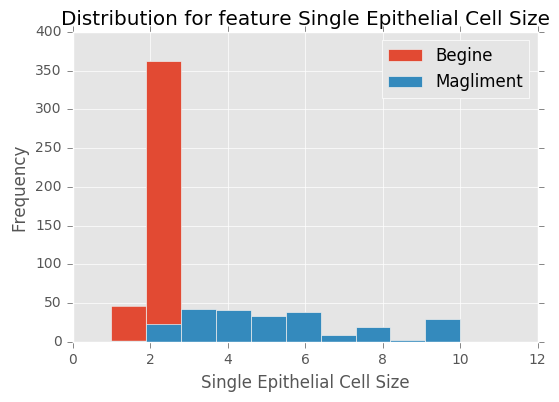

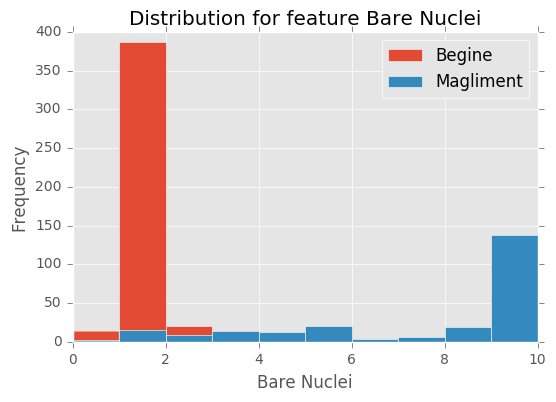

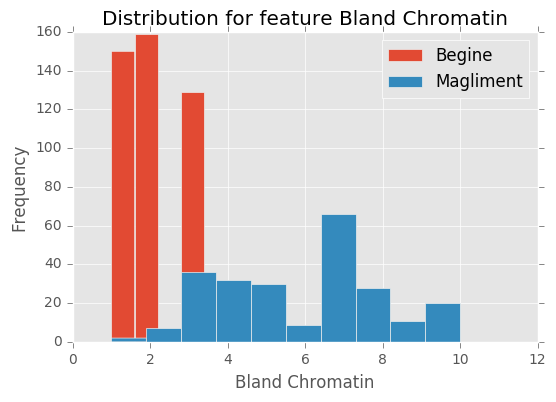

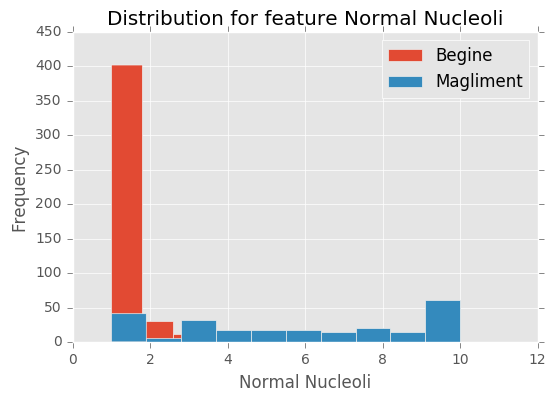

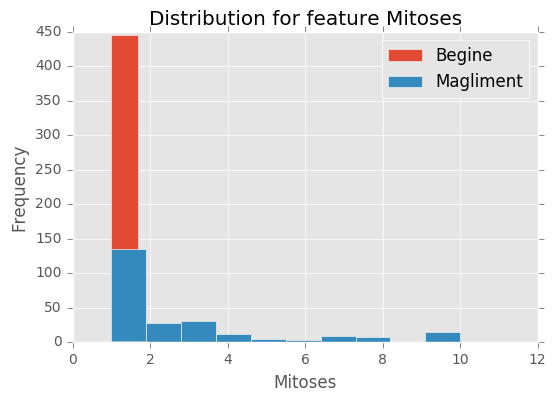

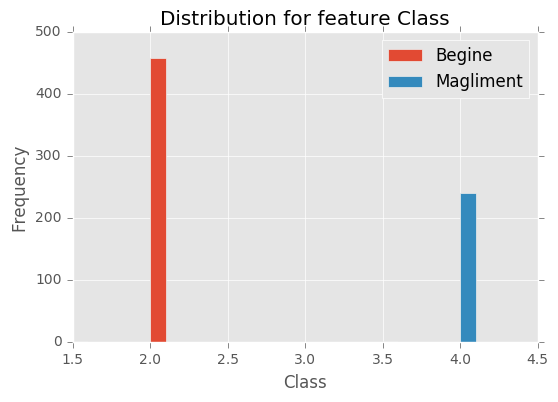

In [13]:
# first to explore the distribution of each features
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
def feature_his(df, cols, is_transform = False):
    '''
    this function is used to examine the distribution of features
    '''
    for col in cols:
        ax,fig = plt.subplots()
        df[df['Class'] == 2][col].plot(kind = 'hist', bins = 10, logy = is_transform)   
        df[df['Class'] == 4][col].plot(kind = 'hist', bins = 10, logy = is_transform)   
        plt.ylabel("Frequency")
        plt.xlabel(col)
        plt.title('Distribution for feature %s'%col)
        plt.legend(['Begine', 'Magliment'])
feature_his(data, data.columns[1:11])

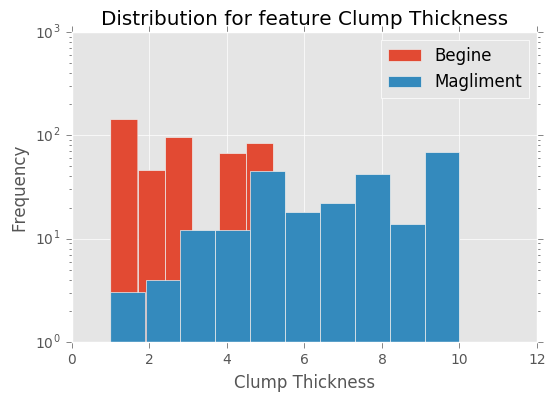

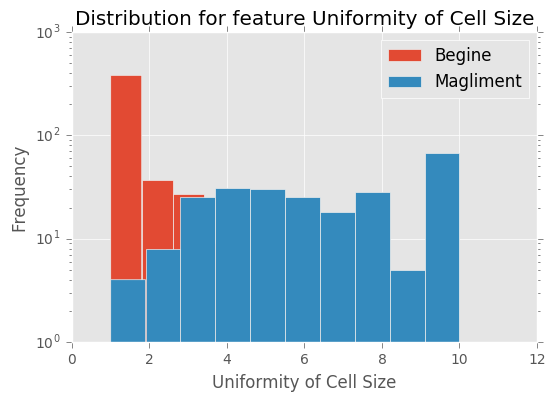

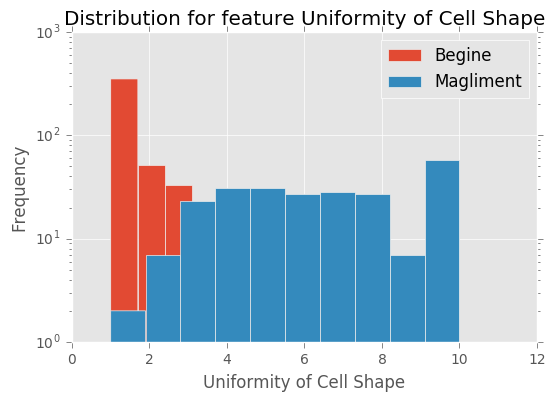

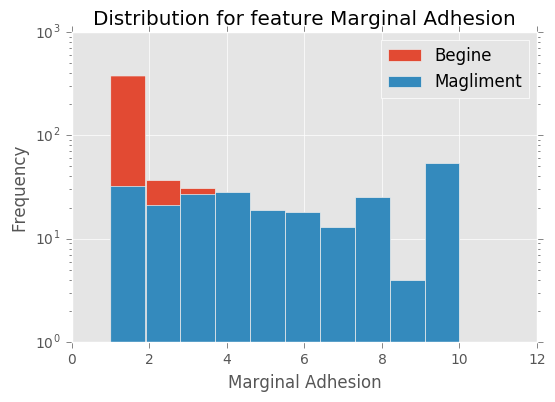

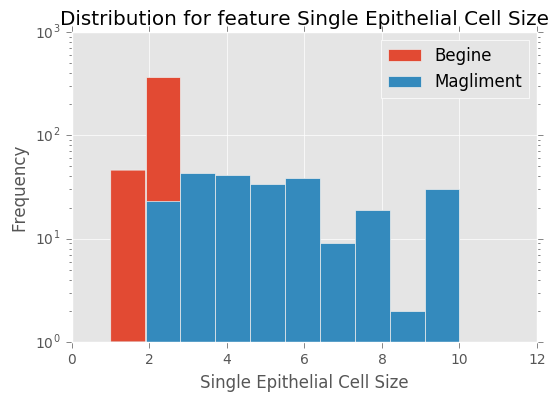

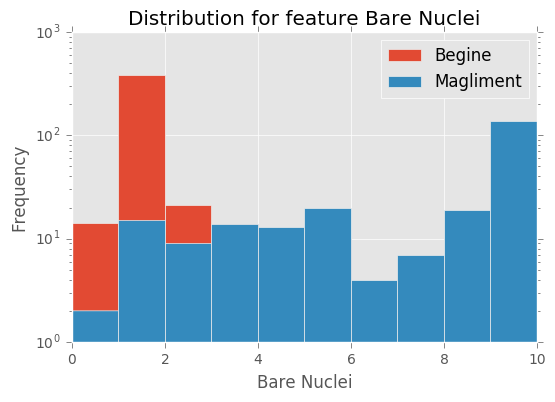

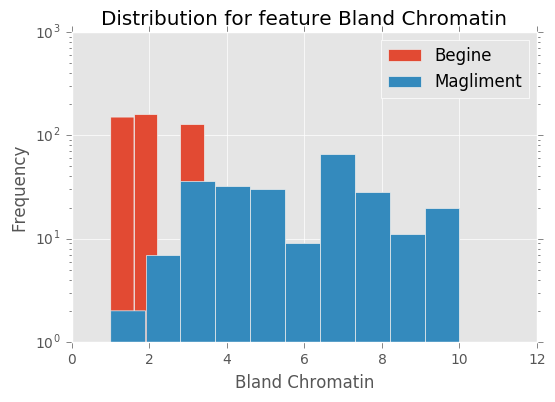

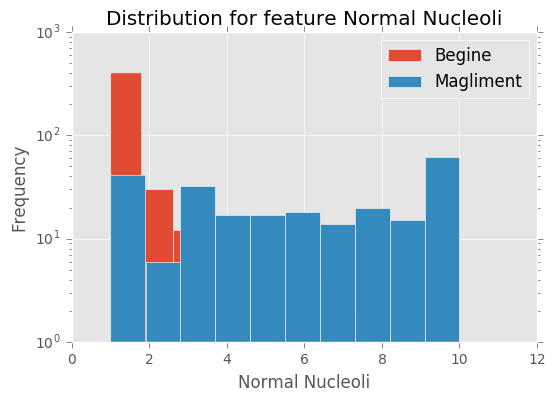

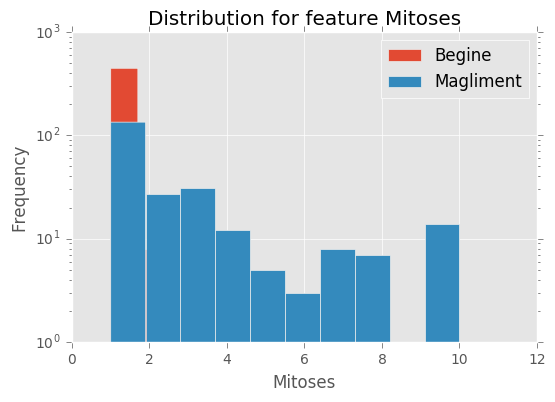

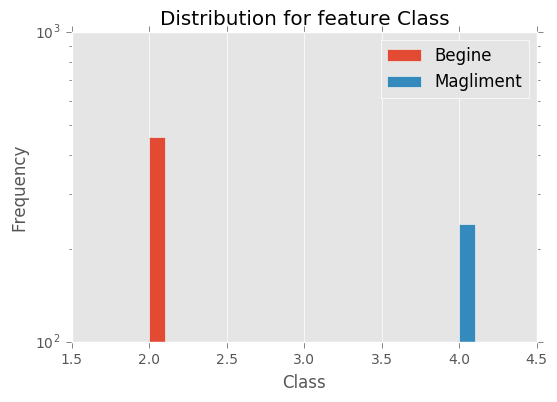

In [14]:
# apply log transformation to y axis
feature_his(data, data.columns[1:11], is_transform = True)

Most of the features have skewed distribution such as uniformality cell size, cell shapes and marginal adhesion. Next, the correlation between features are examined.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d94790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d3f74d0>]], dtype=object)

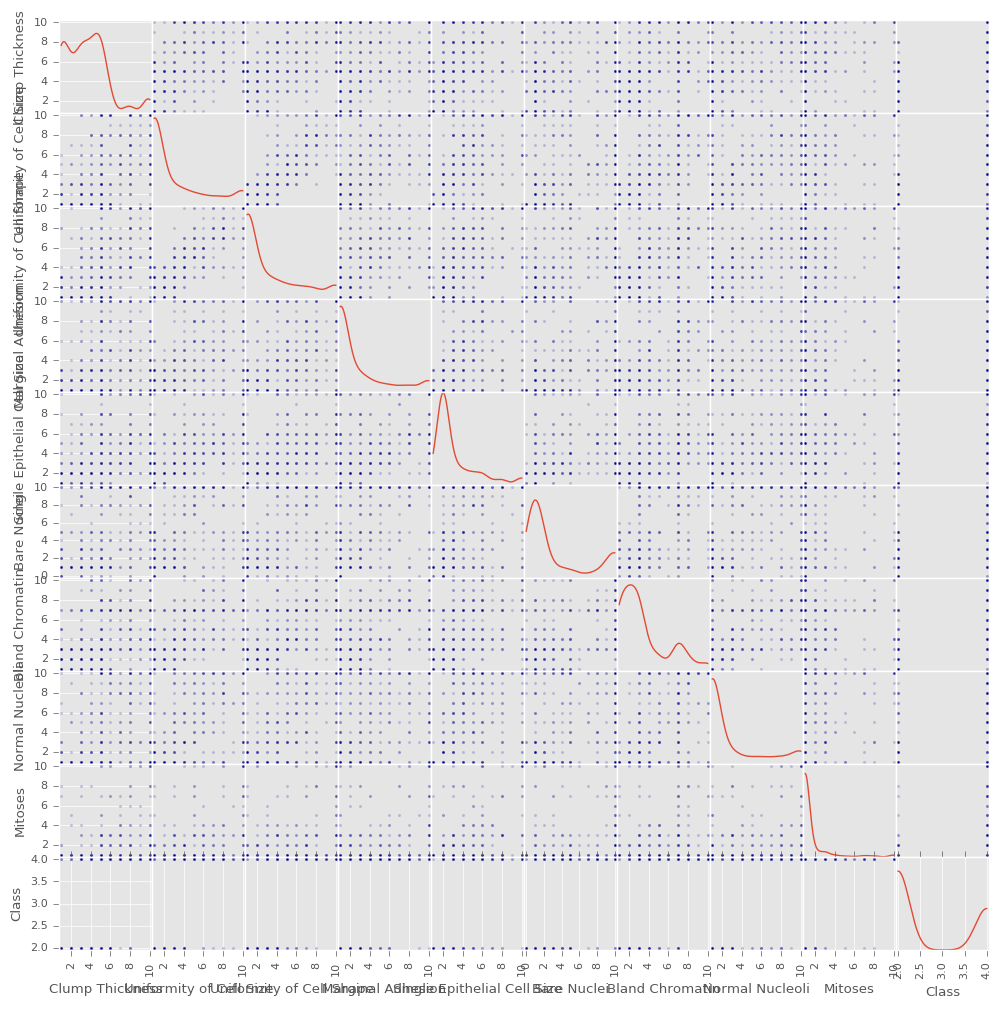

In [15]:
# explore the feature correlations
from pandas.tools.plotting import scatter_matrix
cols = data.columns[1:11]
feature_data = data[cols]
matplotlib.rcParams.update({'font.size': 8})
scatter_matrix(feature_data, alpha=0.2, figsize=(12, 12), diagonal='kde', c = 'darkblue')

Feature-feature correlation heatmap

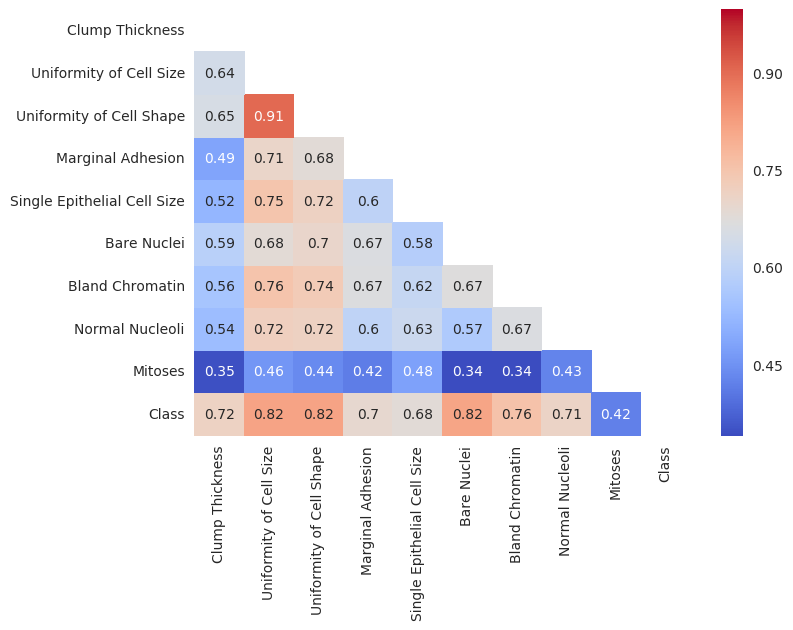

In [16]:
import seaborn as sns
import numpy as np
correlation = data[cols].corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    matplotlib.rcParams.update({'font.size': 10})
    sns.heatmap(correlation, cmap = 'coolwarm', annot = True, mask = mask)

Again, the distributions of features are skewed (red line). Some features are linear correlated, for example Uniformity of Cell Size and Uniformity of Cell shape. But, most of them are not correlated.

<a id='machine_learning'></a>
### 4. Machine Learning Model to Predict if a Breast Tumor Is Benign or Malignant

#### 4.1 Split training and test data set

In [17]:
# import library
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
import re
# get features
X = data[data.columns[1:10]].values
# get labels and binarize them
labels = [0 if value == 2 else 1 for value in data['Class'].values]
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20,\
                                                    random_state = 42)
# examine the data shape in train and test data
print 'Train data: ', X_train.shape
print 'Test data: ', X_test.shape

Train data:  (559, 9)
Test data:  (140, 9)


#### 4.2 Use ensemble to down sampling and balance classes

In [18]:
from collections import Counter
from imblearn.ensemble import EasyEnsemble

print 'Original dataset shape {}'.format(Counter(y_train))
ee_count = EasyEnsemble (random_state = 42)
X_train_res, y_train_res = ee_count.fit_sample(X_train, y_train)
X_train_res, y_train_res = X_train_res[0], y_train_res[0]
print 'Resampled dataset shape (count vectorizer) {}'.format(Counter(y_train_res))

Original dataset shape Counter({0: 363, 1: 196})
Resampled dataset shape (count vectorizer) Counter({0: 196, 1: 196})


/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
def plot_learning_curve(title, labels, colors, train_sizes_list, 
                        train_scores_list, test_scores_list, is_two_plots = False):
    '''
    this method plots training and cross-validation learning curves
    '''
    # define a figure layout and labels
    plt.figure(figsize = (10,8))
    plt.title(title)
    plt.xlabel('Training sample size')
    plt.ylabel('Recall Score')
    plt.grid()  
    plt.ylim([0.8, 1.0])
    matplotlib.rcParams.update({'font.size': 20})
    # use length = 2 to plot 4 lines
    length = 2
    # used length = 1 to plot 2 lines
    if is_two_plots:
        length = 1
    for i in range(length):      
        line_label = labels[i]
        line_color = colors[i]
        train_sizes, train_scores, test_scores = train_sizes_list[i], \
                                                 train_scores_list[i], test_scores_list[i]
        # compute the mean score and standard deviation
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        # plot train curve
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color=line_color[0])
        plt.plot(train_sizes, train_scores_mean, 'o-', color=line_color[0],
                 label=line_label[0], linewidth = 5)
        # plot cross-validation curve
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=line_color[1])
        plt.plot(train_sizes, test_scores_mean, '^--', color=line_color[1],
                 label=line_label[1], linewidth = 5)
        plt.legend(bbox_to_anchor=(0., 1.1, 1., .105),loc=3, mode='expand',
                   borderaxespad=0.)
    return plt

In [20]:
def model_selection(clf, X_train, y_train, title, labels, colors, score, is_two_plots = True):
    '''
    learning and cross-validation curves for different models
    '''
    train_sizes_list = []
    train_scores_list = []
    test_scores_list = []
    cv = ShuffleSplit(n_splits = 5,test_size=0.2, random_state=42)
    train_sizes=np.linspace(.1, 1.0, 10)
    # get data trained with clf
    train_sizes, train_scores, test_scores = learning_curve(
                clf, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring = score)
    train_sizes_list.append(train_sizes)
    train_scores_list.append(train_scores)
    test_scores_list.append(test_scores)
    # generated learning curves to measure the performance of clf
    if is_two_plots:
        print plot_learning_curve(title, labels1, colors, train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = is_two_plots)
    return train_sizes_list, train_scores_list, test_scores_list

#### 4.3 LogisticRegression default model
First, a default LogisticRegression model is trained.

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 31,  62,  93, 125, 156, 187, 219, 250, 281, 313])],
 [array([[ 0.93376068,  1.        ,  1.        ,  1.        ,  1.        ],
         [ 0.96743697,  1.        ,  0.96153846,  0.98076923,  1.        ],
         [ 0.96674419,  1.        ,  0.95674419,  0.96599437,  0.97843228],
         [ 0.97529593,  0.97617828,  0.97628205,  0.97579406,  0.96783325],
         [ 0.95952024,  0.97434211,  0.96786125,  0.96077785,  0.9681938 ],
         [ 0.97222222,  0.96789148,  0.97317547,  0.96773455,  0.97328987],
         [ 0.97159664,  0.96801501,  0.97264387,  0.97264387,  0.97722723],
         [ 0.97838486,  0.97192881,  0.97612189,  0.97612189,  0.98399078],
         [ 0.97404121,  0.97152989,  0.97516221,  0.97504813,  0.97864742],
         [ 0.9669335 ,  0.97764576,  0.97762535,  0.98401519,  0.97116013]])],
 [array([[ 0.88760504,  0.80897436,  0.92339744,  0.86153846,  0.92797158],
         [ 0.92682073,  0.88589744,  0.97467949,  0.89871795,  0.9628553 ],
         [ 0.93662465, 

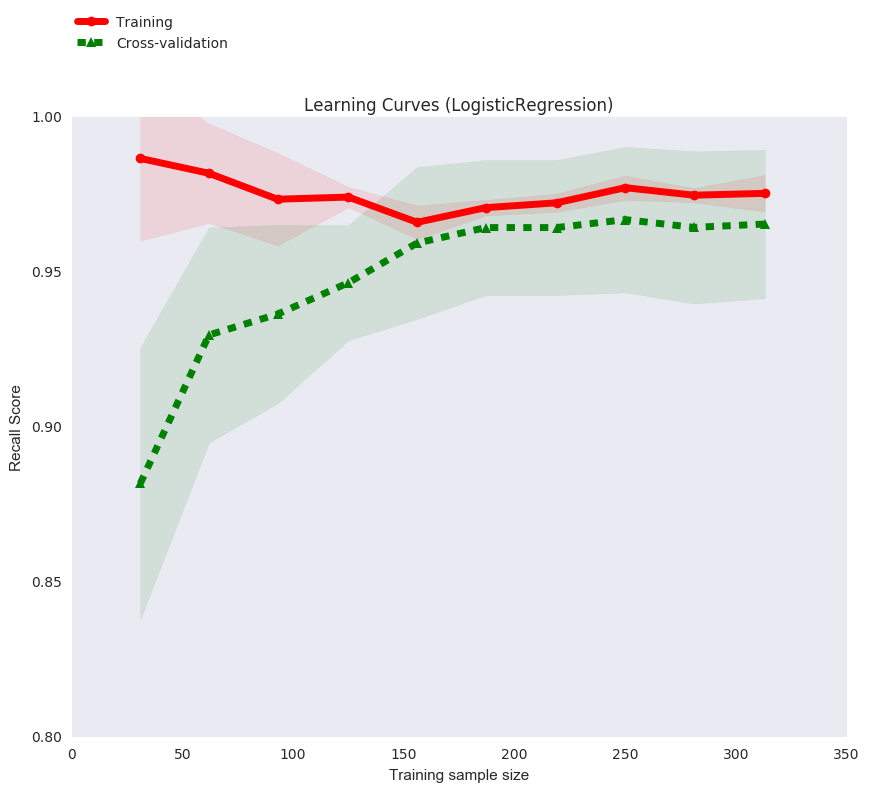

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import learning_curve

# set up a LogisticRegression classifier
lr_clf = LogisticRegression(random_state=42)
title = 'Learning Curves (LogisticRegression)'
# set colors: r -red, g- green, b - blue, m - magenta
colors = [('r', 'g')] 
labels1 = [('Training', 'Cross-validation')]
score = 'recall_macro'
# curves for LogisticRegression
model_selection(lr_clf, X_train_res, y_train_res, title, labels1, colors, score)

The model showed good performance and the variance between training and validation decreased as training example size increased. Then, the model is optimized with different parameters

#### 4.4 LogisticRegression optimization

In [22]:
from sklearn.model_selection import GridSearchCV
def search_best_params(X, y, clf, params):
    '''
    this method searchs the best parameters for a classifier
    '''
    model = GridSearchCV(clf, params, cv = 5, n_jobs =1, scoring = 'recall_macro')
    model.fit(X, y)
    best_parameter = model.best_params_
    return best_parameter

In [23]:
# setup LogisticRegression classifiers
lr_clf = LogisticRegression(random_state=42)
# setup parameters for searching: tol - Tolerance for stopping criteria; C - Inverse of 
# regularization strength; must be a positive float. Like in support vector machines, 
# smaller values specify stronger regularization; penalty - Used to specify the norm used 
# in the penalization.
lr_parameters = {'tol' : np.logspace(-8, -3, 5),
                     'C' : np.logspace(-3, 3, 6),
                    'penalty': ['l1', 'l2']} 
# search best parameters
lr_best_params = search_best_params(X_train_res, y_train_res,lr_clf,
                                      lr_parameters)
print 'Best parameters for count vectorizer (Logistic Regression): ', lr_best_params

Best parameters for count vectorizer (Logistic Regression):  {'penalty': 'l1', 'C': 3.9810717055349691, 'tol': 1e-08}


<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 31,  62,  93, 125, 156, 187, 219, 250, 281, 313])],
 [array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.96837209,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.97628205,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.96786125,  0.99324324,  0.97429136],
         [ 0.97790404,  0.98380266,  0.96785633,  0.99456522,  0.97860901],
         [ 0.98579832,  0.98628023,  0.96805671,  0.99545455,  0.98173173],
         [ 0.98739387,  0.99199795,  0.96799181,  0.99606299,  0.98399078],
         [ 0.98895859,  0.98933637,  0.97516221,  0.9857635 ,  0.97864742],
         [ 0.98370279,  0.98401519,  0.97444063,  0.98722032,  0.97769608]])],
 [array([[ 0.95448179,  0.93653846,  0.96153846,  0.93653846,  0.97674419],
         [ 0.93662465,  0.94935897,  0.98717949,  0.93653846,  0.9744832 ],
         [ 0.94642857, 

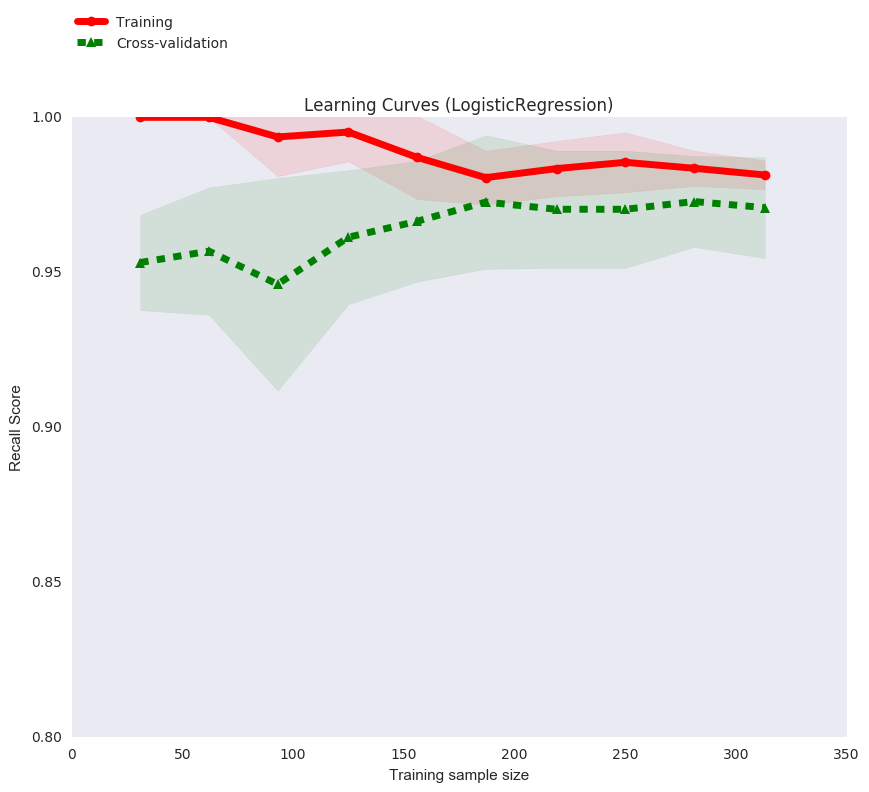

In [24]:
# define the LogisticRegression with best parameters
lr_clf_best = LogisticRegression(random_state=42,**lr_best_params)
# set labels for graph
labels2 = [
          ('Training (opt params)', 
           'Cross-validation (opt params)')]
# learning and cross-validation curves for optimized LogisticRegression
model_selection(lr_clf_best, X_train_res, y_train_res, title, labels2, colors, score)

#### 4.5 LogisticRegression default and optimization comparisons

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


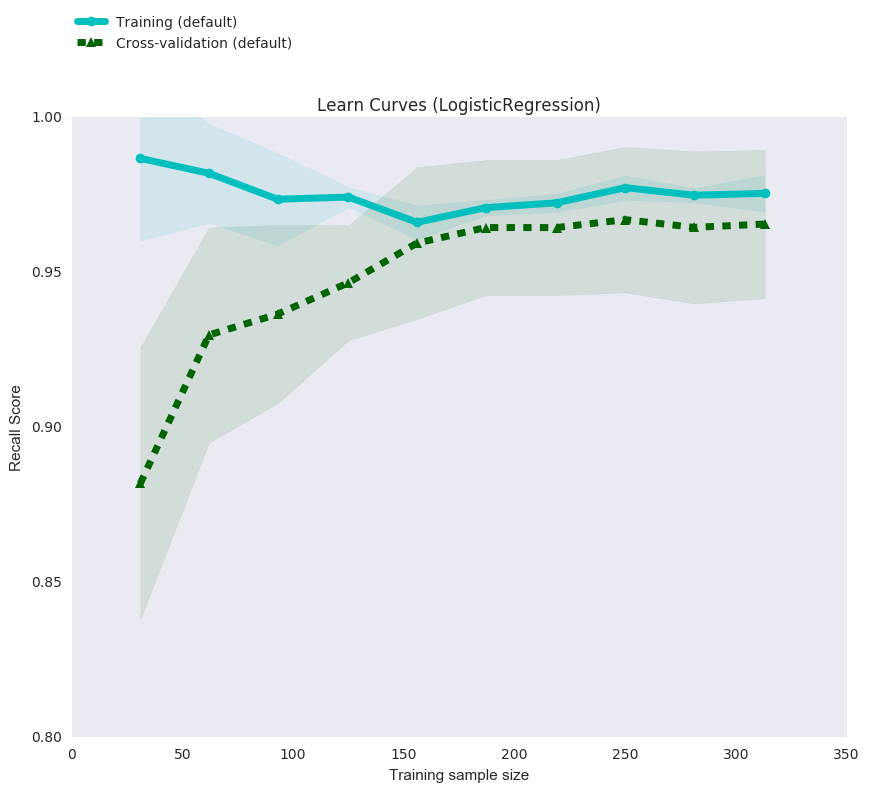

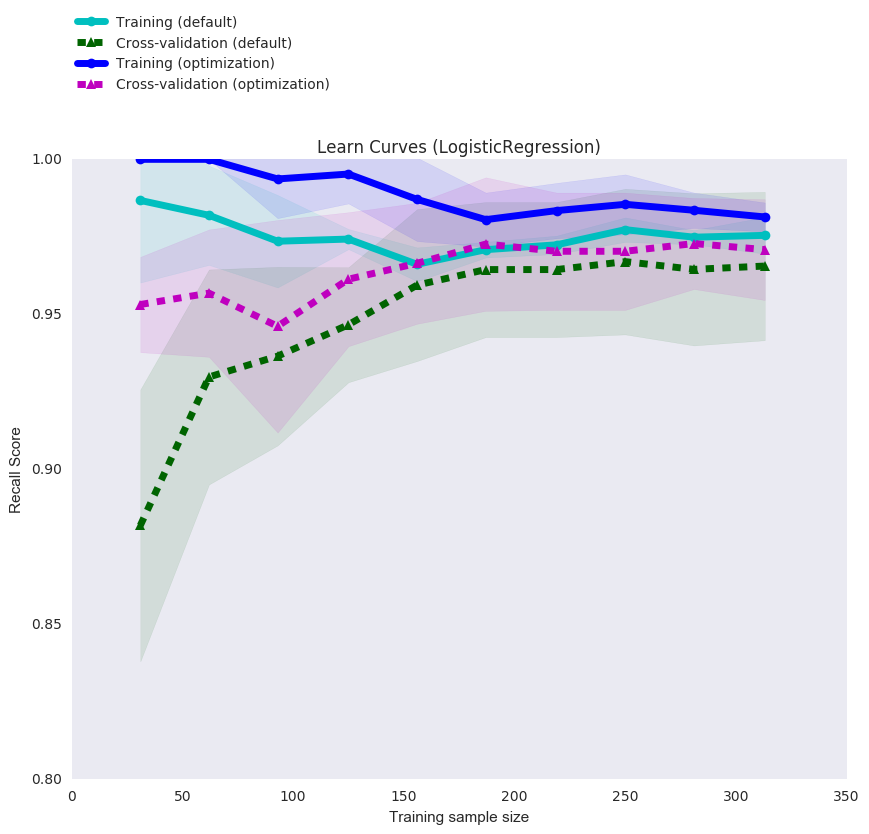

In [25]:
title = 'Learn Curves (LogisticRegression)'
labels3 = [('Training (default)', 
           'Cross-validation (default)')]
labels4 = labels3 + [('Training (optimization)', 
           'Cross-validation (optimization)')]

# Learning curves with default parameters
train_sizes_list, train_scores_list, test_scores_list = model_selection(lr_clf, X_train_res, y_train_res, 
                                                        title, labels2, colors, score, is_two_plots = False)
print plot_learning_curve(title, labels3, [('c','darkgreen')], train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = True)
# Learning curves with default or optimizated parameters
train_sizes_list_1, train_scores_list_1, test_scores_list_1 = model_selection(lr_clf_best, X_train_res, y_train_res, 
                                                            title, labels2, colors, score, is_two_plots = False)
train_sizes_list += train_sizes_list_1
train_scores_list += train_scores_list_1
test_scores_list  += test_scores_list_1
print plot_learning_curve(title, labels4, [('c','darkgreen'), ['b', 'm']], train_sizes_list, train_scores_list, 
                          test_scores_list)

The performance of the optimized LogisticRegression model is improved as compared the cross-validation curves.

#### 4.6 Ridge classifier (default model)
The second model implemented is Ridge classifier.

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 31,  62,  93, 125, 156, 187, 219, 250, 281, 313])],
 [array([[ 0.96153846,  1.        ,  1.        ,  0.96875   ,  1.        ],
         [ 0.96428571,  1.        ,  0.96153846,  0.98076923,  0.96875   ],
         [ 0.93023256,  0.98913043,  0.95674419,  0.97560976,  0.96938776],
         [ 0.94827586,  0.96721311,  0.97628205,  0.95901639,  0.94776119],
         [ 0.95652174,  0.97368421,  0.96786125,  0.96621622,  0.95665788],
         [ 0.95517677,  0.96153846,  0.96259437,  0.9673913 ,  0.95207046],
         [ 0.94079832,  0.96788991,  0.9588407 ,  0.97272727,  0.9502002 ],
         [ 0.94685333,  0.96341463,  0.95973369,  0.97244094,  0.95530225],
         [ 0.95407487,  0.96785714,  0.95673662,  0.97137501,  0.95739615],
         [ 0.95611658,  0.96176302,  0.95535277,  0.96798955,  0.95794526]])],
 [array([[ 0.95273109,  0.91089744,  0.96153846,  0.91217949,  0.92797158],
         [ 0.93312325,  0.93653846,  0.98717949,  0.92467949,  0.98837209],
         [ 0.94292717, 

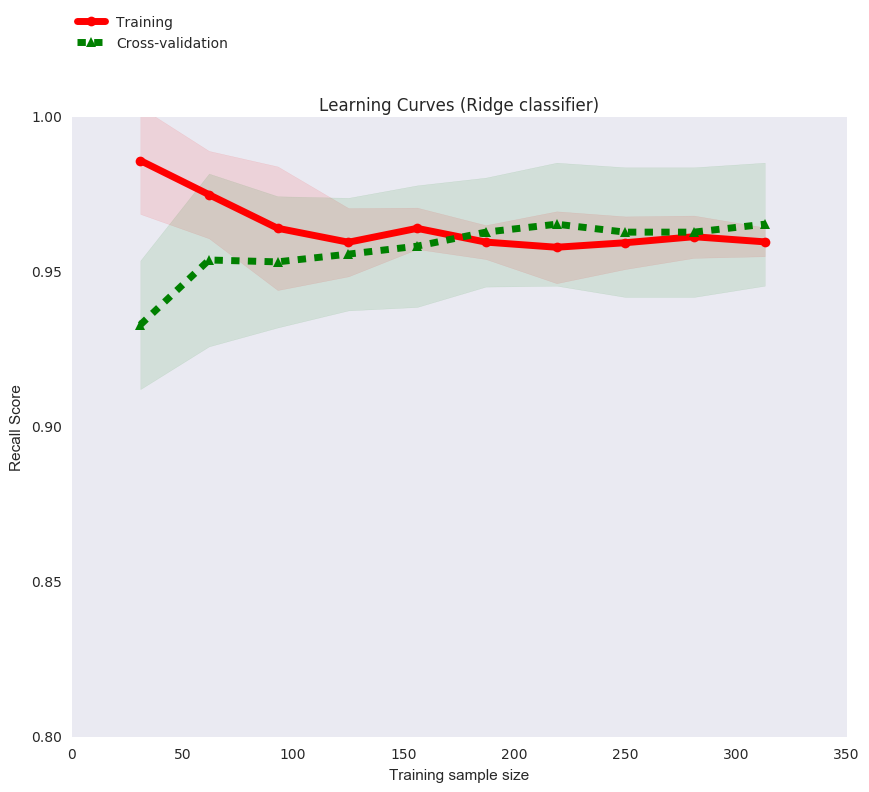

In [26]:
from sklearn.linear_model import RidgeClassifier


# set up a Ridge classifier
l_clf = RidgeClassifier(random_state = 42)

title = 'Learning Curves (Ridge classifier)'
# set colors: r -red, g- green
colors = [('r', 'g')] 
labels1 = [('Training', 'Cross-validation')]
        
model_selection(l_clf, X_train_res, y_train_res, title, labels1, colors, score)

#### 4.7 Ridge classifier optimization

In [27]:
# setup Ridge classifiers
l_clf = RidgeClassifier(random_state = 42)
# setup parameters for searching
l_parameters = {'tol' : np.logspace(-8, -3, 5),
                     'alpha' : [0.01, 0.1, 2.0, 5, 10, 50],
                    'normalize': [False, True]} 
# search best parameters
l_best_params = search_best_params(X_train_res, y_train_res,l_clf,
                                      l_parameters)
print 'Best parameters for count vectorizer (Ridge classifier): ', l_best_params

Best parameters for count vectorizer (Ridge classifier):  {'normalize': True, 'alpha': 2.0, 'tol': 1e-08}


<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


([array([ 31,  62,  93, 125, 156, 187, 219, 250, 281, 313])],
 [array([[ 0.96153846,  1.        ,  1.        ,  0.96875   ,  0.96153846],
         [ 0.96428571,  1.        ,  0.98076923,  0.98076923,  0.953125  ],
         [ 0.94186047,  0.98913043,  0.94511628,  0.95121951,  0.97959184],
         [ 0.95689655,  0.96721311,  0.95961538,  0.96721311,  0.97014925],
         [ 0.96376812,  0.97368421,  0.96786125,  0.96621622,  0.95665788],
         [ 0.96085859,  0.96703297,  0.96259437,  0.97282609,  0.94675132],
         [ 0.95579832,  0.96788991,  0.96342786,  0.97727273,  0.9456957 ],
         [ 0.96036684,  0.96747967,  0.95973369,  0.97244094,  0.95120389],
         [ 0.96182681,  0.96428571,  0.96038625,  0.96777789,  0.95739615],
         [ 0.95956486,  0.96813245,  0.95853748,  0.96798955,  0.95140931]])],
 [array([[ 0.93487395,  0.94935897,  0.96153846,  0.93685897,  0.97674419],
         [ 0.94467787,  0.92371795,  0.96153846,  0.89967949,  0.98837209],
         [ 0.96253501, 

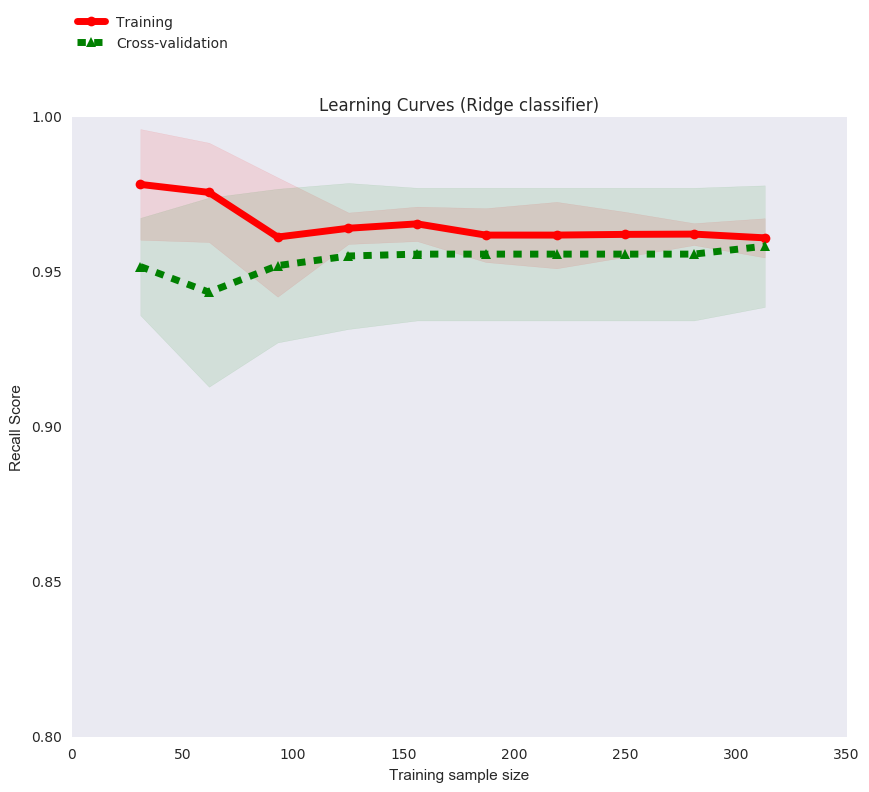

In [28]:
# define the Ridge classifier with best parameters
l_clf_best = RidgeClassifier(random_state=42,**l_best_params)
# set labels for graph
labels2 = [
          ('Training (opt params)', 
           'Cross-validation (opt params)')]

model_selection(l_clf_best, X_train_res, y_train_res, title, labels2, colors, score)

#### 4.8 Compare Ridge classifier with and without optimization

<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/Volumes/Work/DataScience/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


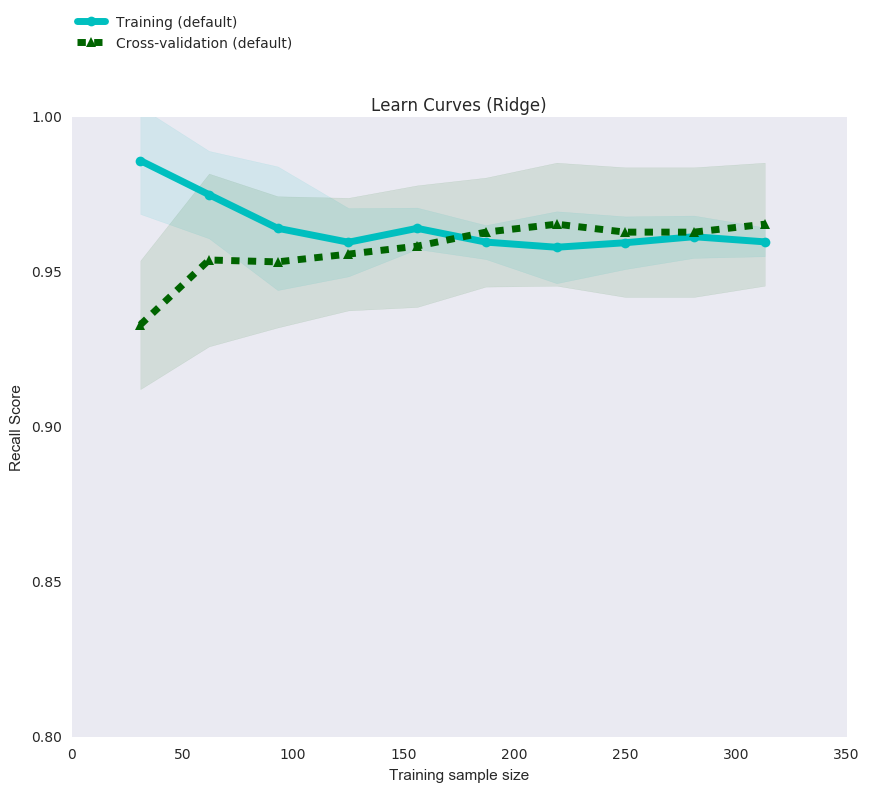

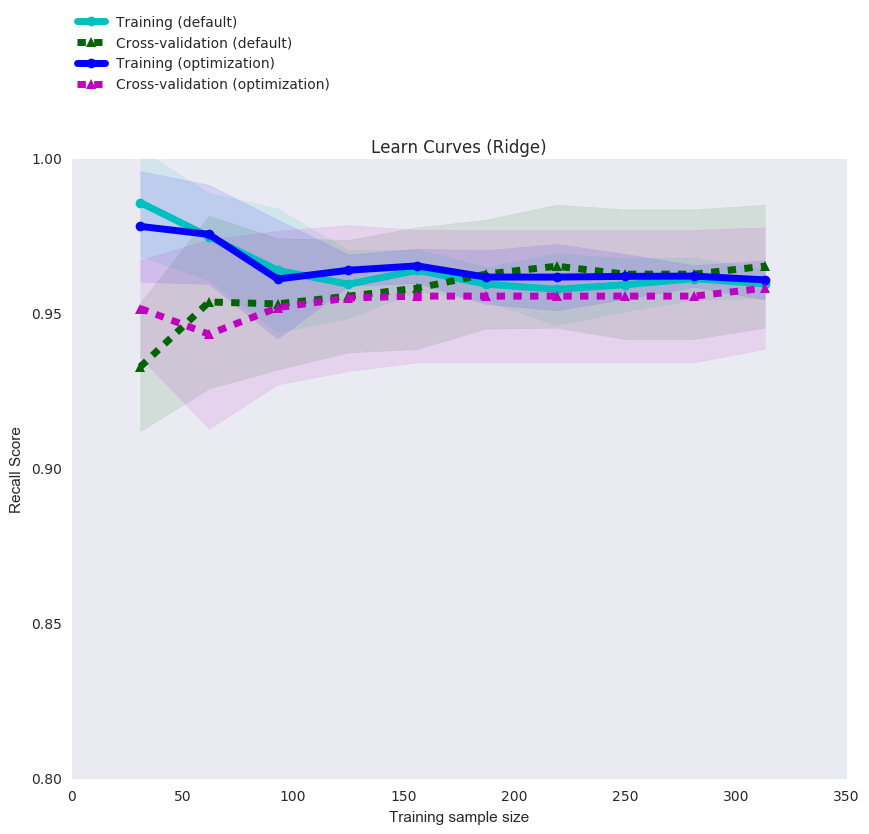

In [29]:
title = 'Learn Curves (Ridge)'
labels3 = [('Training (default)', 
           'Cross-validation (default)')]
labels4 = labels3 + [('Training (optimization)', 
           'Cross-validation (optimization)')]

# Learning curves with default parameters
train_sizes_list, train_scores_list, test_scores_list = model_selection(l_clf, X_train_res, y_train_res, 
                                                        title, labels2, colors, score, is_two_plots = False)
print plot_learning_curve(title, labels3, [('c','darkgreen')], train_sizes_list, train_scores_list, 
                          test_scores_list, is_two_plots = True)
# Learning curves with default or optimizated parameters
train_sizes_list_1, train_scores_list_1, test_scores_list_1 = model_selection(l_clf_best, X_train_res, y_train_res, 
                                                            title, labels2, colors, score, is_two_plots = False)
train_sizes_list += train_sizes_list_1
train_scores_list += train_scores_list_1
test_scores_list  += test_scores_list_1
print plot_learning_curve(title, labels4, [('c','darkgreen'), ['b', 'm']], train_sizes_list, train_scores_list, 
                          test_scores_list)

#### 4.9 Final comparisons based on test data set

In [30]:
def model_compare(models, X_train, y_train, X_test):
    '''
    function to compare different models based on test dataset
    '''
    times = []
    preds = []
    for model in models:
        t1 = time.time()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        t2 = time.time()
        times.append(t2 - t1)
        preds.append(pred)
    return times, preds

                      accu_score  precision  recall_score      time
Logistic \n(default)   97.142857  96.725146     96.725146  0.002133
Logistic \n(opt)       97.142857  96.725146     96.725146  0.004148
Ridge \n(default)      96.428571  96.768707     95.029240  0.001322
Ridge \n(opt)          96.428571  96.164773     95.614035  0.001254


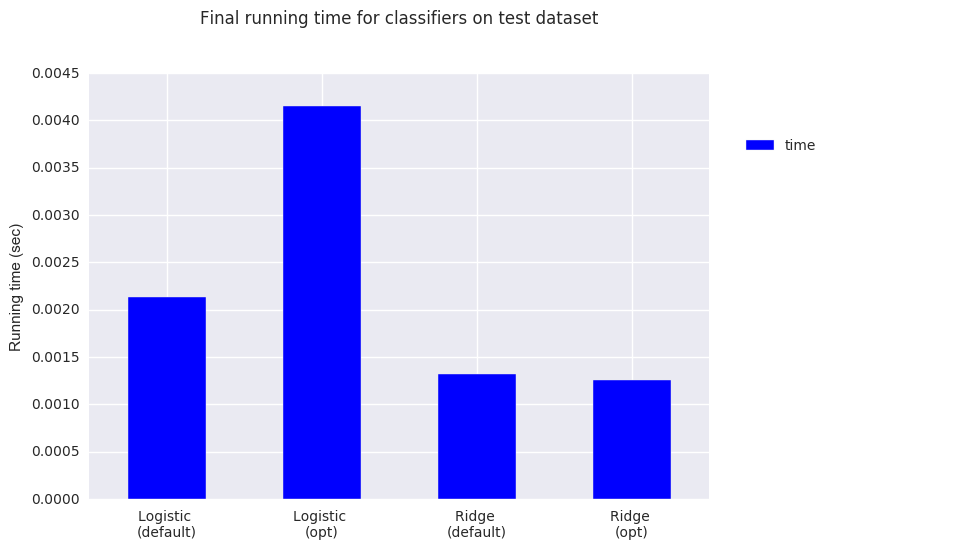

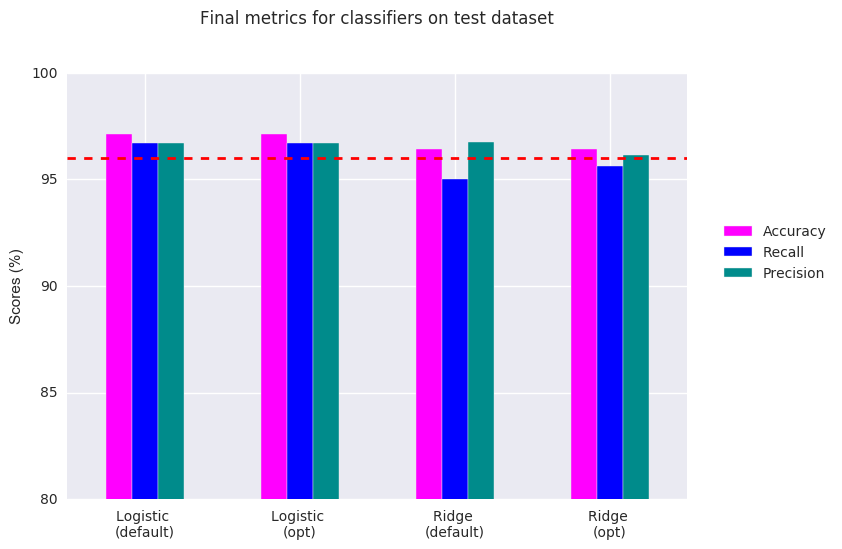

In [31]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report
import time

# set up LogisticRegression classifiers
lr_clf = LogisticRegression(random_state=42)
lr_clf_best = LogisticRegression(random_state=42,**lr_best_params)
# set up Ridge classifiers
l_clf = RidgeClassifier(random_state=42)
l_clf_best = RidgeClassifier(random_state=42,**l_best_params)

models = [lr_clf, lr_clf_best, l_clf, l_clf_best]

times, preds = model_compare(models, X_train_res, y_train_res, X_test)

# print out final comparison results
models_names = ['Logistic \n(default)', 
        'Logistic \n(opt)', 
        'Ridge \n(default)', 
        'Ridge \n(opt)']
# compute metrics
accuracy_scores = [accuracy_score(y_test, pred)*100 for pred in preds]
recall_scores = [recall_score(y_test, pred, average = 'macro')*100 for pred in preds]
precision_scores = [precision_score(y_test, pred, average = 'macro')*100 for pred in preds]
f1_scores = [f1_score(y_test, pred)*100 for pred in preds]
# put data into pandas dataframe
df = pd.DataFrame({'time':times, 'accu_score': accuracy_scores, 'recall_score': recall_scores, 
                   'precision': precision_scores})
df.index = models_names
# print the data
print df
# plot the time graph
plt.Figure(figsize = (15,8))
df[['time']].plot(kind = 'bar', color = ['b'], rot = 0)
plt.legend(['time'], bbox_to_anchor=(1.05, .8, 0.35, 0),loc=3, mode="expand",
                   borderaxespad=0.)
plt.ylabel('Running time (sec)')
plt.title('Final running time for classifiers on test dataset', y = 1.1)
# plot the final metrics graph
plt.Figure(figsize = (15,8))
df_1 = df[['accu_score', 'recall_score', 'precision']]
df_1.plot(kind = 'bar', color = ['magenta', 'blue', 'darkcyan'], rot = 0)
plt.ylim([80, 100])
plt.legend(['Accuracy', 'Recall', 'Precision'], bbox_to_anchor=(1.05, 0.5, 0.75, 0),loc=3,
                   borderaxespad=0.)
plt.axhline(y = 96., color = 'red', linestyle='dashed', linewidth=2)
plt.ylabel('Scores (%)')
plt.title('Final metrics for classifiers on test dataset', y = 1.1)

The model with best performance based on recall is the LogisticRegression. Then, the confusion matrix and ROC curves for this model is explored to better understand the perfoemance of the model

Confusion matrix, without normalization
[[93  2]
 [ 2 43]]
Normalized confusion matrix
[[ 0.98  0.03]
 [ 0.05  0.96]]


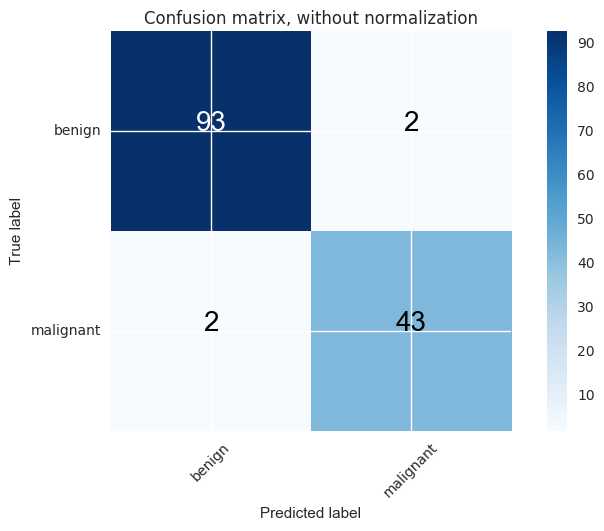

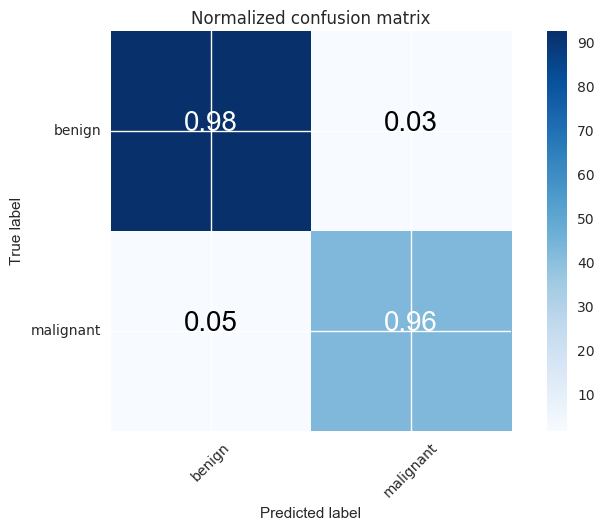

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import math
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        for i in range(2):
            cm[i] = [math.ceil(j*100)/100 for j in cm[i]]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, preds[1])
np.set_printoptions(precision=2)
class_names = ['benign', 'malignant']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print classification_report(y_test, preds[1])

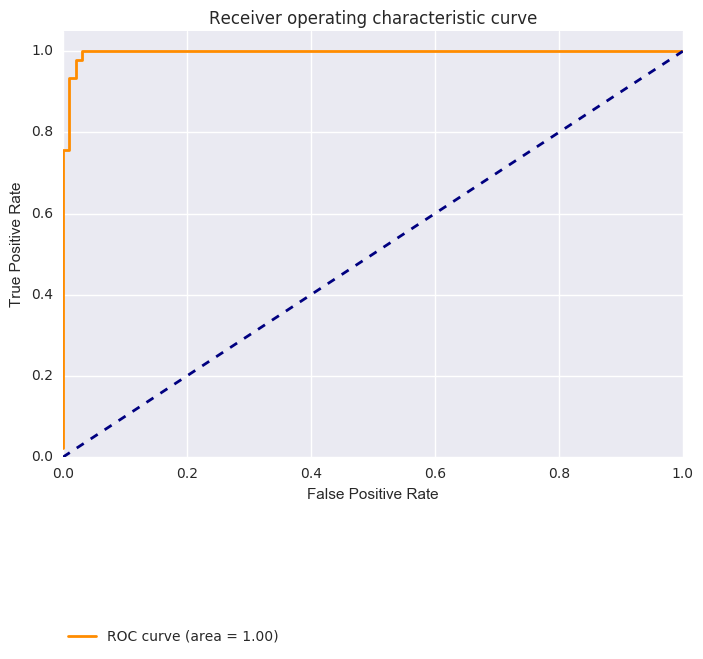

In [33]:
from sklearn.metrics import roc_curve, auc
lr_clf_best = LogisticRegression(random_state=42,**lr_best_params)

y_score = lr_clf_best.fit(X_train, y_train)\
                                .decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(bbox_to_anchor=(0, -.45, 0.75, 0),loc=3,
                   borderaxespad=0.)
plt.show()

Based on the confusion matrix and ROC, the model performance is pretty good to predict both benign and malignant breast tumors.

<a id='feature_analysis'></a>
### 5. Feature Importance Analysis
Finally, the features that are used to train the LogisticRegression model is analyzed.

In [34]:
weights = lr_clf_best.coef_[0]
xlabels = data.columns[1:10]
print 'Features\t', 'Weights'
for (w, l) in zip(weights, xlabels):
    print l, '%.2f'%w

Features	Weights
Clump Thickness 0.52
Uniformity of Cell Size 0.02
Uniformity of Cell Shape 0.42
Marginal Adhesion 0.21
Single Epithelial Cell Size 0.09
Bare Nuclei 0.43
Bland Chromatin 0.37
Normal Nucleoli 0.01
Mitoses 0.32


The Clump Thickness, Bare Nuclei, Uniformity of Cell Shape, Bland Chromatin, Mitoses and Marginal Adhesion are identified as the important features by the algorithm.

<a id='summary'></a>
### 6. Summary
In summary, this notebook analyzed the breast cancer dataset and fixed the missing values in Bare Nuclei. This analysis also explored the distribution of each features and found that the distributions are skewed. Finally, different machine learning models are implemented and validated to classify the breast tumor types. Interestingly, the LogisticRegression yields best recall and accuracy.